## Тема “Обучение с учителем”

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_boston

In [16]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.linear_model import LinearRegression

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [57]:
from sklearn.ensemble import RandomForestRegressor 

**Задание 1**

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [40]:
boston = load_boston()

In [41]:
data = boston["data"]

In [42]:
target = boston["target"]
target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [43]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [44]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
y = pd.DataFrame(target, columns=["price"])

In [46]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)

In [51]:
y_pred[:5]

array([[28.64896005],
       [36.49501384],
       [15.4111932 ],
       [25.40321303],
       [18.85527988]])

In [52]:
y_pred.shape

(152, 1)

In [53]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(5)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280


In [54]:
r2_score(y_test, y_pred)

0.71122600574849

In [55]:
mean_squared_error(y_pred, y_test)

21.51744423117745

In [56]:
mean_absolute_error(y_pred, y_test)

3.1627098714574244

**Задание 2**

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [62]:
clf = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)

In [64]:
clf.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [65]:
y_pred = clf.predict(X_test)

In [66]:
r2_score(y_test, y_pred)

0.87472606157312

In [67]:
mean_squared_error(y_pred, y_test)

9.334548946165196

In [68]:
mean_absolute_error(y_pred, y_test)

2.0831253879090608

Исходя из трех метрик выше, RandomForestRegressor обеспечивает меньшую величину ошибки.

**Задание 3**

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [71]:
feature_importances = clf.feature_importances_

In [72]:
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances':feature_importances})

In [73]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
12,LSTAT,0.415847
5,RM,0.402682
7,DIS,0.063973
0,CRIM,0.031676
10,PTRATIO,0.018081
6,AGE,0.014299
4,NOX,0.014269
11,B,0.012451
9,TAX,0.011525
2,INDUS,0.007138


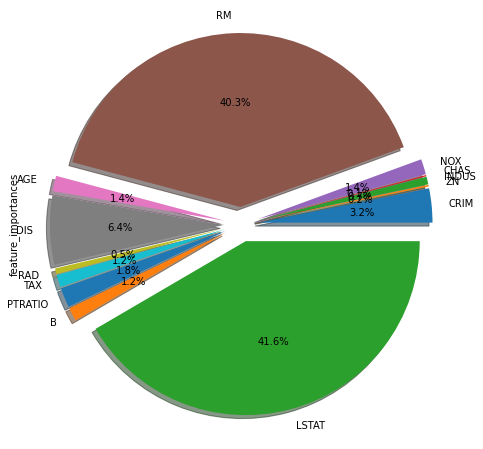

In [74]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

LM и